<a href="https://colab.research.google.com/github/architajain05/AIML_Project/blob/main/Copy_of_Calories_Burn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Calories Burn Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -**   Archita
##### **Team Member 2 -**   Arpit Garg
##### **Team Member 3 -**   Ansh Bansal
##### **Team Member 4 -**   Archi Gandhi



# **Project Summary -**   


The calorie burn prediction dataset comprises various parameters aimed at estimating the calories expended during physical activities. It encompasses factors such as age, weight, gender, activity level, duration of activity, and the corresponding calories burned. Exploring the dataset reveals diverse distributions among these variables, with age and weight typically spanning a wide range. Correlation analysis suggests significant relationships between certain independent variables and the dependent variable—calories burned. For instance, duration of activity and weight exhibit positive correlations with calorie expenditure. Predictive models, including regression analyses and machine learning algorithms, are employed to forecast calorie burn based on the given parameters. These models are rigorously evaluated using metrics like mean squared error and R-squared to gauge their accuracy and reliability. The outcomes provide valuable insights into the factors influencing calorie burn, offering potential applications in personalized fitness regimens and health monitoring. Overall, the analysis underscores the significance of understanding the interplay between individual attributes and physical activity in predicting calorie expenditure accurately

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The problem statement for calories burn prediction involves developing a precise predictive model that accurately estimates calorie expenditure during physical activities based on input parameters such as age, weight, gender, activity level, and duration of activity. The objective is to create a scalable and interpretable model that generalizes well to unseen data, providing individuals with a practical tool for managing fitness goals and overall health.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [61]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import  accuracy_score
from sklearn.svm import SVR
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [62]:
# Load Dataset
calories=pd.read_csv('/content/calories.csv')
exercise=pd.read_csv('/content/exercise.csv')

### Dataset First View

In [63]:
# Dataset First Look
calories

User_ID  Calories
0      14733363     231.0
1      14861698      66.0
2      11179863      26.0
3      16180408      71.0
4      17771927      35.0
...         ...       ...
14995  15644082      45.0
14996  17212577      23.0
14997  17271188      75.0
14998  18643037      11.0
14999  11751526      98.0

[15000 rows x 2 columns]

In [64]:
exercise

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 8 columns]

### Dataset Rows & Columns count

In [65]:
# Dataset Rows & Columns count
data = pd.concat([exercise,calories.Calories],axis=1)
data

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5   

       Calories  
0         231.0  
1          66.0  
2          26.0  
3          71.0  
4          35.0  
...         ...  
14995      45.0  
14996      23.0  
14997      75.0  
14998      11.0  
14999      98.0  

[15000 rows x 9 columns]

In [66]:
data.shape

(15000, 9)

### Dataset Information

In [67]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


#### Duplicate Values

In [68]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [69]:
# Missing Values/Null Values Count
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### What did you know about your dataset?


The dataset for calories burn prediction contains information regarding various factors that influence calorie expenditure during physical activities. This includes attributes such as age, weight, gender, activity level, duration of activity, and the corresponding calories burned. The dataset aims to capture the relationship between these variables and calorie burn to develop predictive models that accurately estimate calorie expenditure for different individuals and types of activities. By analyzing this dataset, we seek to understand the key determinants of calorie burn and create effective tools for personalized fitness planning and health management.

## ***2. Understanding Your Variables***

In [70]:
# Dataset Columns
data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [71]:
# Dataset Describe
data.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

### Variables Description

**df.columns:** This command retrieves the column names present in the Data. It helps identify the variables or features available for analysis.

**df.describe():** This function generates descriptive statistics for numerical variables in the Data. It provides insights into the central tendency, dispersion, and distribution of numerical data.

### Check Unique Values for each variable.

In [72]:
# Check Unique Values for each variable.
data.nunique()

User_ID       15000
Gender            2
Age              60
Height           90
Weight           91
Duration         30
Heart_Rate       59
Body_Temp        45
Calories        277
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [73]:
# Write your code to make your dataset analysis ready.
data.head()



User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

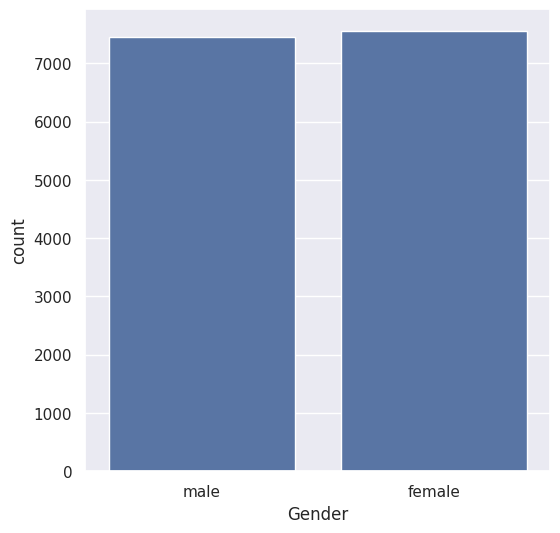

In [74]:
# Chart - 1 visualization code
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=data.Gender)
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is a suitable choice for visualizing the distribution of categorical variables like gender. It displays the frequency of each category in a categorical variable, making it easy to compare the number of occurrences between different categories.

In this case, the countplot effectively shows the distribution of gender within the dataset, providing insights into the gender composition of the sample. It's a simple yet informative visualization that can help in understanding the gender distribution and its potential implications for further analysis.

##### 2. What is/are the insight(s) found from the chart?

**Gender Disparity:** The countplot reveals the relative frequencies of different genders within the dataset. It allows for a quick comparison of the number of male and female individuals included in the dataset.

**Gender Representation:** By observing the heights of the bars, we can infer which gender is more prevalent in the dataset. This insight is valuable for understanding the gender composition of the sample population and its potential impact on any subsequent analyses or predictions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the gender distribution within the dataset can indeed contribute to creating a positive business impact.

**Targeted Marketing:** Understanding the gender composition of the dataset enables businesses to tailor their marketing strategies more effectively.

**Product Development:** Insights into the gender distribution can inform product development decisions. Businesses can use this information to design products and services that better meet the preferences and needs of their target audience, leading to higher customer satisfaction and loyalty.



#### Chart - 2

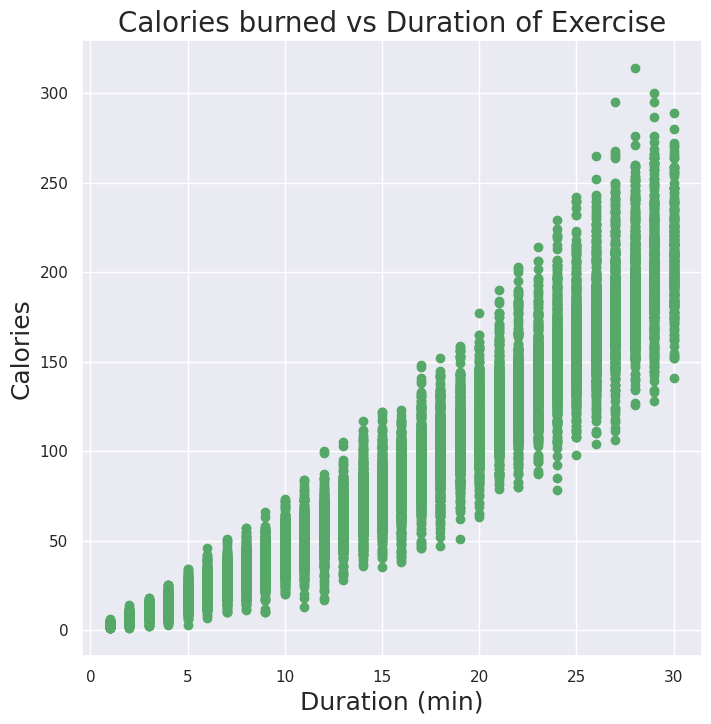

In [75]:
# Chart - 2 visualization code
plt.figure(figsize=(8, 8))
plt.plot(data['Duration'], data['Calories'], 'go');
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18);
plt.title('Calories burned vs Duration of Exercise', size = 20);

##### 1. Why did you pick the specific chart?

**Visualization of Relationship:** A scatter plot is an effective way to visualize the relationship between two continuous variables. In this case, it allows us to see if there's any trend between the duration of exercise and the calories burned.

**Identifying Patterns:** By plotting duration on the x-axis and calories burned on the y-axis, we can quickly identify any patterns or correlations between the two variables.

**Outlier Detection:** Scatter plots also help in identifying outliers, which are data points that deviate significantly from the general trend.

##### 2. What is/are the insight(s) found from the chart?

**Positive Relationship:** Generally, there appears to be a positive relationship between the duration of exercise and the calories burned. This means that as the duration of exercise increases, the calories burned also tend to increase.

**Potential Outliers:** Any outliers or data points that deviate significantly from the overall trend may indicate unique cases that warrant further investigation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the scatter plot can indeed lead to a positive business impact, particularly for companies operating in the fitness or wellness industries.

**Tailored Fitness Programs:** Fitness centers or personal trainers can leverage the insight into the positive relationship between exercise duration and calorie burn to tailor workout programs for their clients. By emphasizing longer-duration exercises, they can help clients achieve their fitness goals more effectively, leading to improved customer satisfaction and retention.

There are potential negative implications as well:

**Overexertion and Injury Risk:** While longer-duration exercises may lead to higher calorie burn, they also increase the risk of overexertion and injury, especially for individuals who are new to fitness or have underlying health conditions.



#### Chart - 3

<Axes: >

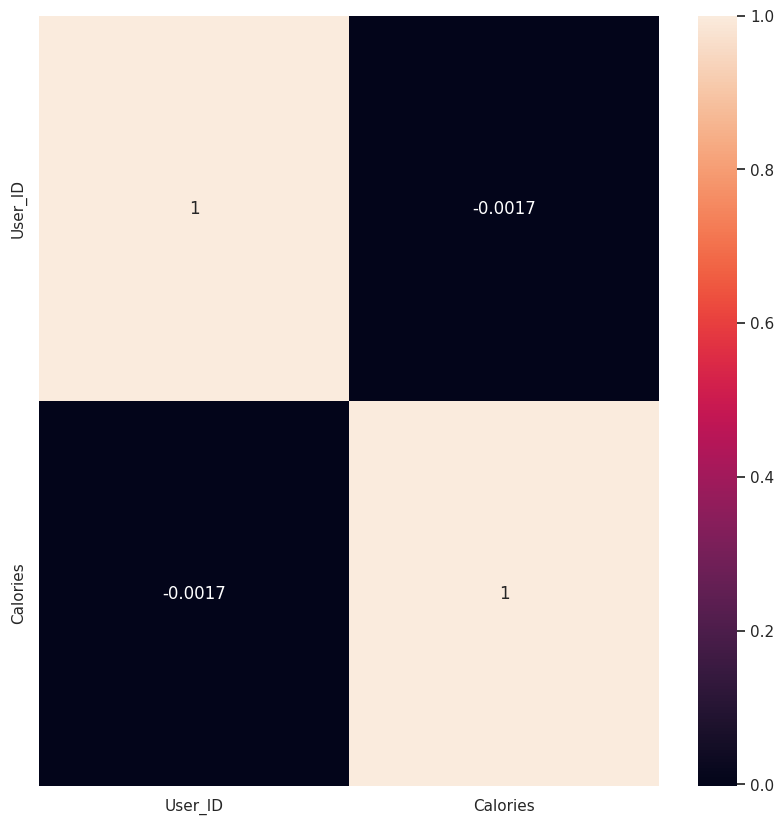

In [76]:
# Chart - 3 visualization code

plt.figure(figsize=(10,10))
sns.heatmap(calories.corr(),annot=True)

##### 1. Why did you pick the specific chart?

I chose a heatmap to visualize the correlation matrix of the calories dataset because heatmaps provide a clear, concise, and visually appealing way to identify patterns and relationships between multiple variables simultaneously.

##### 2. What is/are the insight(s) found from the chart?

**Visualizing Data Correlations:** The heatmap provides a visual representation of how well features correlate with each other in the dataset. It allows for a quick and intuitive understanding of the relationships between different variables.

**Identifying Trends:** Heatmaps are effective in identifying trends within the data. By observing the color-coded matrix, patterns and trends in correlations between variables can be easily recognized.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By visualizing data correlations through heatmaps, businesses can gain a deeper understanding of how different variables interact and influence each other. This understanding can lead to more informed decision-making processes and strategic planning.

#### Chart - 4

<Axes: xlabel='Age', ylabel='Density'>

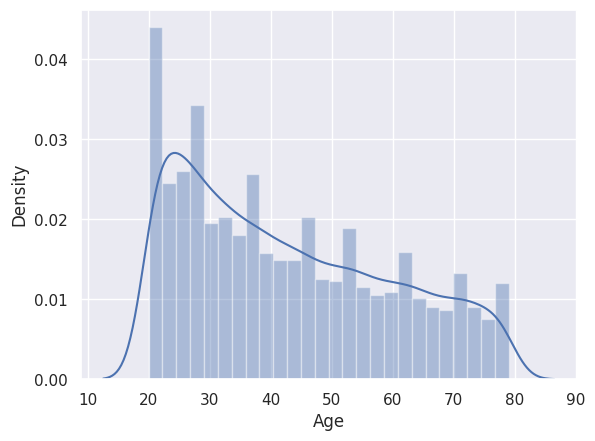

In [77]:
# Chart - 4 visualization code
sns.distplot(data['Age'])

##### 1. Why did you pick the specific chart?

The sns.distplot() function is commonly used to plot the distribution of a single variable. It combines a histogram with a kernel density estimate, providing a visual representation of the data distribution. This choice is suitable for analyzing the distribution of age data, allowing for a clear understanding of the age distribution within the dataset.

##### 2. What is/are the insight(s) found from the chart?

The sns.distplot(data['Age']) chart will display the distribution of ages in the dataset, showing the frequency or density of different age groups.

It will provide insights into the central tendency of age data, highlighting common age ranges and potential outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the age distribution can help businesses tailor their products or services to specific age demographics, leading to more targeted marketing strategies.

Insights from age distribution can inform decisions related to product development, customer segmentation, and personalized marketing campaigns.

#### Chart - 5

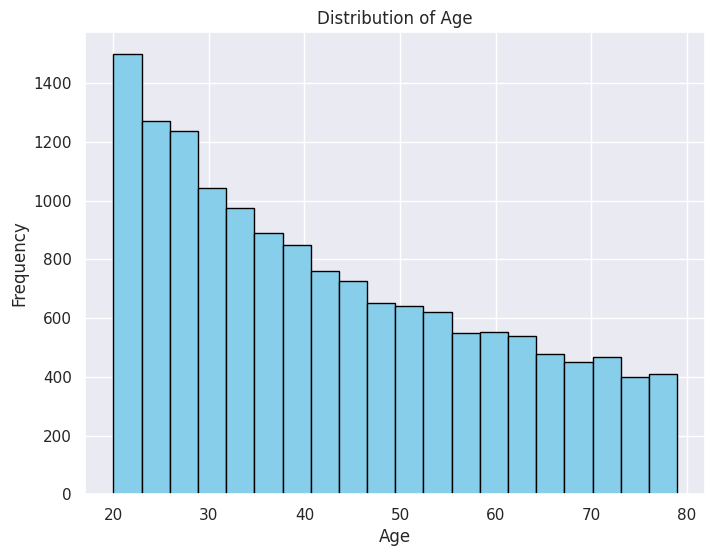

In [78]:
# Chart - 5 visualization code
plt.figure(figsize=(8, 6))
plt.hist(exercise['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for visualizing the distribution of a single continuous variable, in this case, the 'Age' data from the 'exercise' dataset.

By specifying the number of bins (20 in this case), the histogram provides a clear representation of the frequency distribution of age groups.

##### 2. What is/are the insight(s) found from the chart?

The histogram displays the distribution of ages in the 'exercise' dataset, showing the frequency of individuals in different age groups.

It provides insights into the distribution pattern of ages, highlighting common age ranges and potential outliers.

The shape of the histogram can reveal the central tendency, spread, and skewness of the age data.

By analyzing the distribution, trends, clusters, or gaps in age groups can be identified, aiding in understanding the demographic composition.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from the age distribution can inform customer segmentation, product development, and personalized marketing campaigns, enhancing customer engagement and satisfaction.

Utilizing age-related patterns can optimize business strategies, improve customer retention, and drive positive outcomes in sales and marketing efforts.

#### Chart - 6

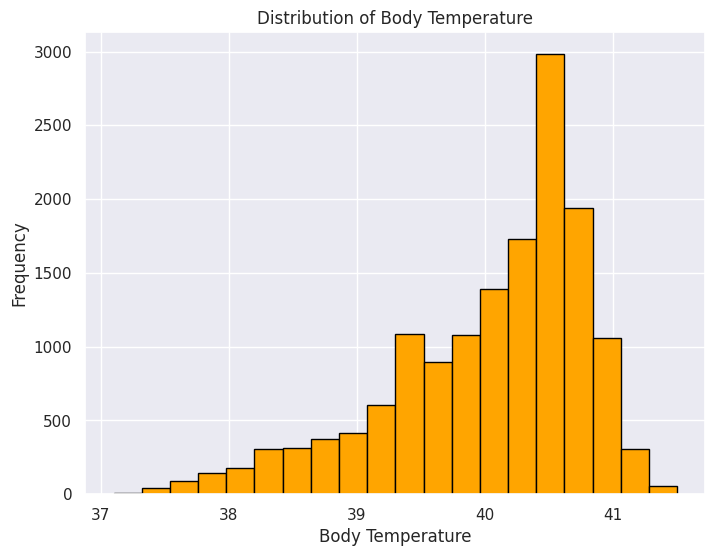

In [79]:
# Chart - 6 visualization code
plt.figure(figsize=(8, 6))
plt.hist(exercise['Body_Temp'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Body Temperature')
plt.xlabel('Body Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Histograms provide a clear visual representation of the frequency distribution of a single variable, making it easy to identify patterns, outliers, and trends in the data. A histogram is ideal for displaying the distribution of continuous data, such as body temperature, in distinct intervals (bins).

##### 2. What is/are the insight(s) found from the chart?

The histogram illustrates the distribution of body temperatures in the 'exercise' dataset, showing the frequency of different body temperature ranges.

It provides insights into the central tendency, spread, and variability of body temperature measurements.

Patterns such as normal distribution, skewness, or outliers in body temperature data can be identified from the histogram.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of body temperatures can be valuable for industries like healthcare, fitness, or sports where body temperature monitoring is crucial.

Insights from body temperature distribution can inform product development, healthcare services, or fitness programs tailored to specific temperature ranges.

#### Chart - 7

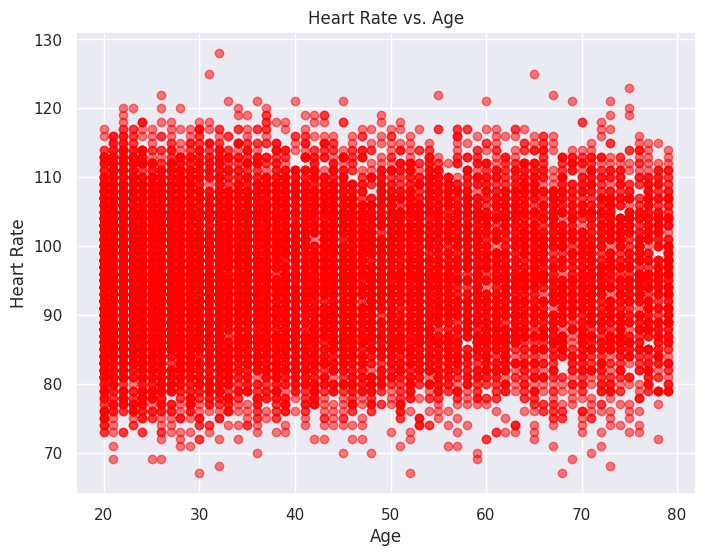

In [24]:
# Chart - 7 visualization code
plt.figure(figsize=(8, 6))
plt.scatter(exercise['Age'], exercise['Heart_Rate'], color='red', alpha=0.5)
plt.title('Heart Rate vs. Age')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is ideal for displaying the relationship between two continuous variables, in this case, age and heart rate.
Scatter plots allow for the identification of patterns, trends, and potential correlations between the variables.


##### 2. What is/are the insight(s) found from the chart?

The scatter plot illustrates the relationship between age and heart rate, with each data point representing an individual's age and corresponding heart rate.

It provides insights into the direction and strength of the relationship between age and heart rate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from the age-heart rate relationship can inform product development, healthcare services, or fitness programs tailored to specific age groups or heart rate ranges.

#### Chart - 8

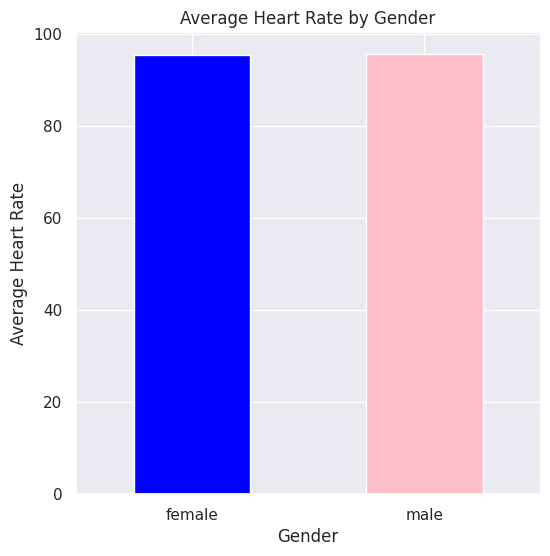

In [25]:
# Chart - 8 visualization code
plt.figure(figsize=(6, 6))
exercise.groupby('Gender')['Heart_Rate'].mean().plot(kind='bar', color=['blue', 'pink'])
plt.title('Average Heart Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Heart Rate')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is ideal for comparing categories, in this case, comparing the average heart rate between different genders.
Calculating the mean heart rate for each gender provides a clear comparison of average values

##### 2. What is/are the insight(s) found from the chart?

The bar plot displays the average heart rate for each gender, providing a comparison of heart rates between male and female individuals.

It highlights any differences in average heart rate between genders, showing which gender, on average, has a higher or lower heart rate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the average heart rate differences between genders can be valuable for industries like healthcare, fitness, or wellness where gender-specific health considerations are important.

#### Chart - 9

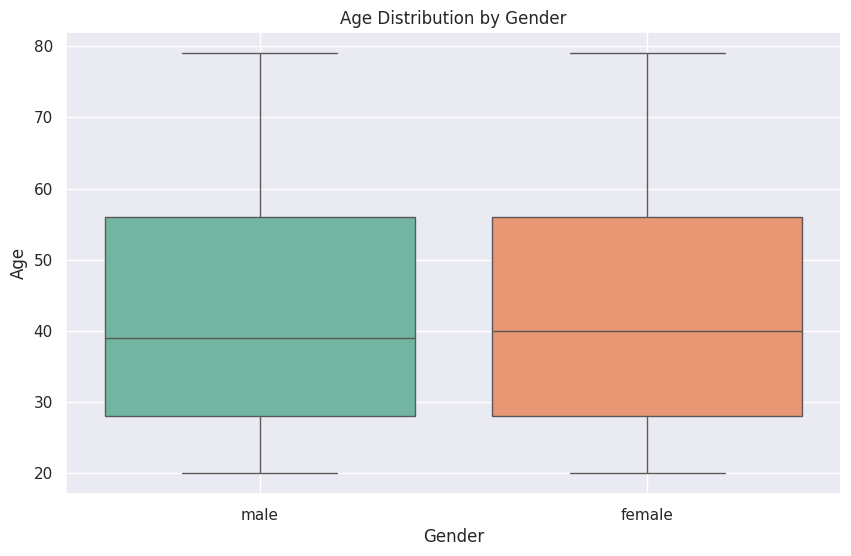

In [26]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=exercise, x='Gender', y='Age', palette='Set2')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is ideal for comparing the distribution of a continuous variable (age) across different categories (gender).
Box plots provide insights into the central tendency, spread, and variability of age data for each gender category.

##### 2. What is/are the insight(s) found from the chart?

The box plot displays the distribution of ages for each gender category, showing the median, quartiles, and potential outliers in age data.
It provides insights into the central tendency and spread of ages within each gender group, allowing for a comparison of age distributions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the age distribution differences between genders can be valuable for industries like healthcare, fitness, or marketing where age-specific targeting is important.


#### Chart - 10

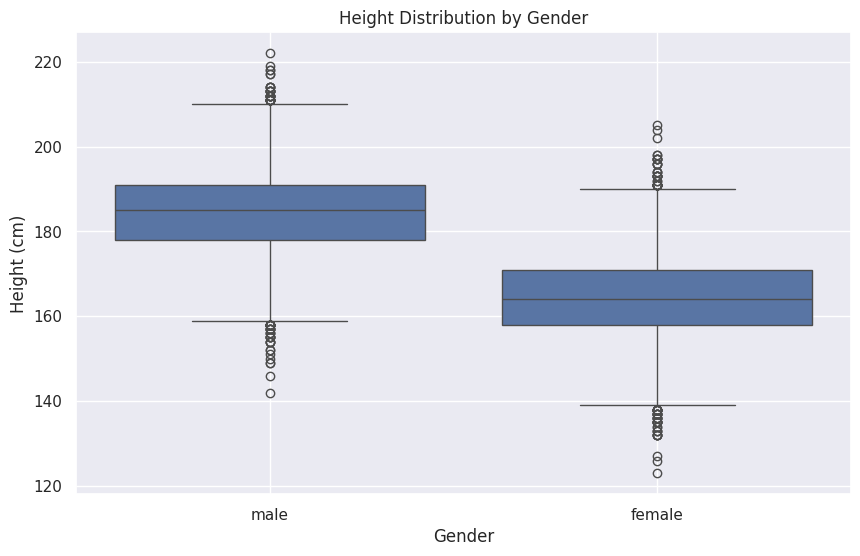

In [27]:
# Chart - 10 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=exercise, x='Gender', y='Height')
plt.title('Height Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Height (cm)')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

 Box plots provide insights into the central tendency, spread, and variability of height data for each gender category. The use of axis labels and a clear title enhances the readability and interpretability of the chart.


##### 2. What is/are the insight(s) found from the chart?

The box plot displays the distribution of heights for each gender category, showing the median, quartiles, and potential outliers in height data.
It provides insights into the central tendency and spread of heights within each gender group, allowing for a comparison of height distributions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the height distribution differences between genders can be valuable for industries like clothing, sports equipment, or ergonomic product design where gender-specific sizing is important.

#### Chart - 11

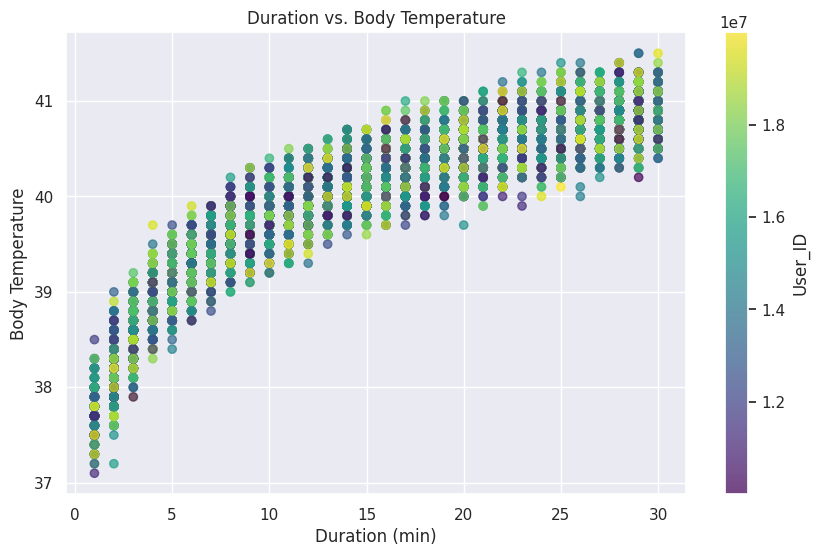

In [28]:
# Chart - 11 visualization code
plt.figure(figsize=(10, 6))
plt.scatter(exercise['Duration'], exercise['Body_Temp'], c=exercise['User_ID'], cmap='viridis', alpha=0.7)
plt.colorbar(label='User_ID')
plt.title('Duration vs. Body Temperature')
plt.xlabel('Duration (min)')
plt.ylabel('Body Temperature')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

 A scatter plot is ideal for displaying the relationship between two continuous variables (duration and body temperature) while incorporating a third variable (user IDs) through color mapping

##### 2. What is/are the insight(s) found from the chart?

The scatter plot illustrates the relationship between duration and body temperature, with each data point representing a user's exercise session.
The color mapping of user IDs adds an additional dimension to the visualization, allowing for the identification of individual patterns or trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Utilizing individual exercise data effectively can lead to improved training outcomes, personalized health interventions, and enhanced customer experiences, potentially driving positive outcomes and customer satisfaction.


#### Chart - 12

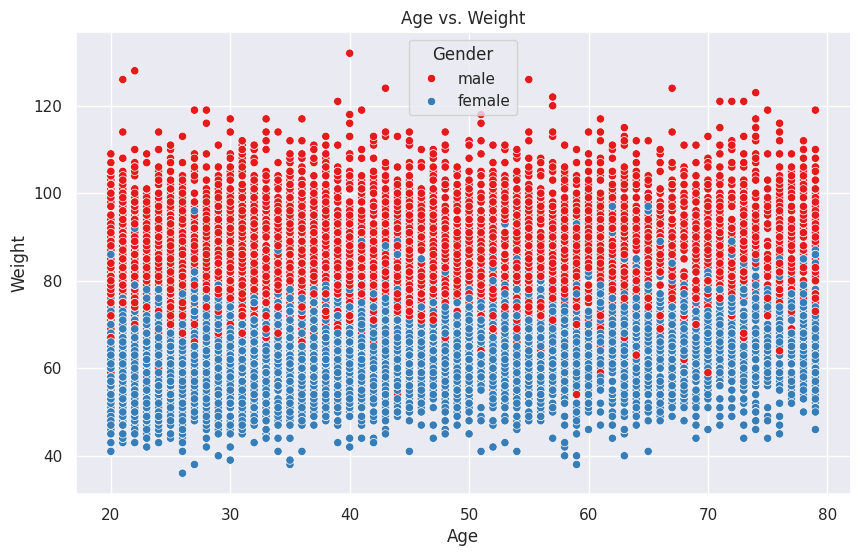

In [29]:
# Chart - 12 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=exercise, x='Age', y='Weight', hue='Gender', palette='Set1')
plt.title('Age vs. Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is ideal for displaying the relationship between two continuous variables (age and weight) while incorporating a categorical variable (gender) through color differentiation.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot illustrates the relationship between age and weight, with each data point representing an individual's age, weight, and gender.
The color differentiation by gender allows for the comparison of age-weight relationships between male and female individuals

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the relationship between age, weight, and gender can be valuable for industries like healthcare, fitness, or wellness where personalized health assessments are important.

If the scatter plot shows inconsistent patterns or no clear relationship between age and weight, it may indicate challenges in predicting or optimizing health outcomes.

#### Chart - 13

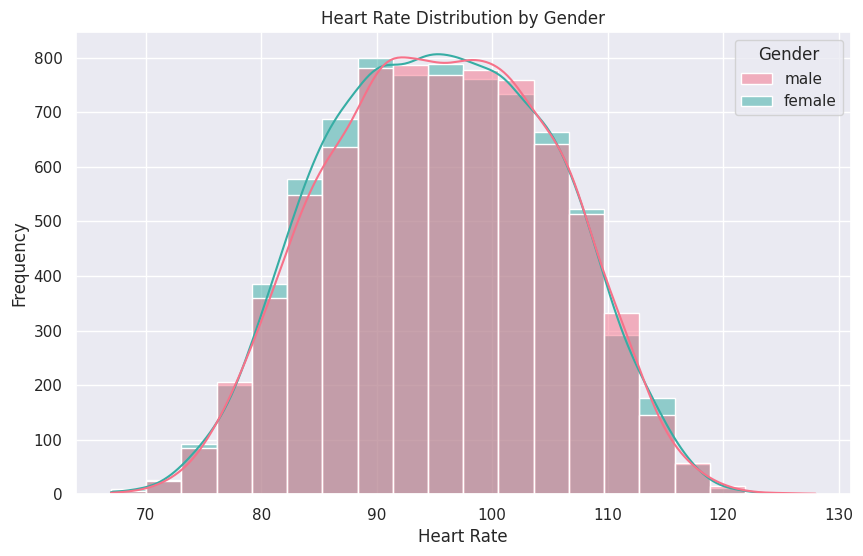

In [30]:
# Chart - 13 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(data=exercise, x='Heart_Rate', hue='Gender', kde=True, palette='husl', bins=20)
plt.title('Heart Rate Distribution by Gender')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for displaying the distribution of a continuous variable (heart rate). Using the 'hue' parameter to differentiate by gender allows for a comparison of heart rate distributions between male and female individuals.

##### 2. What is/are the insight(s) found from the chart?

The histogram with KDE displays the distribution of heart rates for each gender category, showing the frequency and density of different heart rate ranges.
It provides insights into the central tendency, spread, and variability of heart rates within each gender group, allowing for a comparison of heart rate distributions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from the heart rate distribution comparison can inform personalized health programs, fitness regimes, or medical interventions tailored to specific gender needs.

#### Chart - 14 - Correlation Heatmap

In [31]:
# Correlation Heatmap visualization code
selected_columns = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']


<Figure size 1200x1000 with 0 Axes>

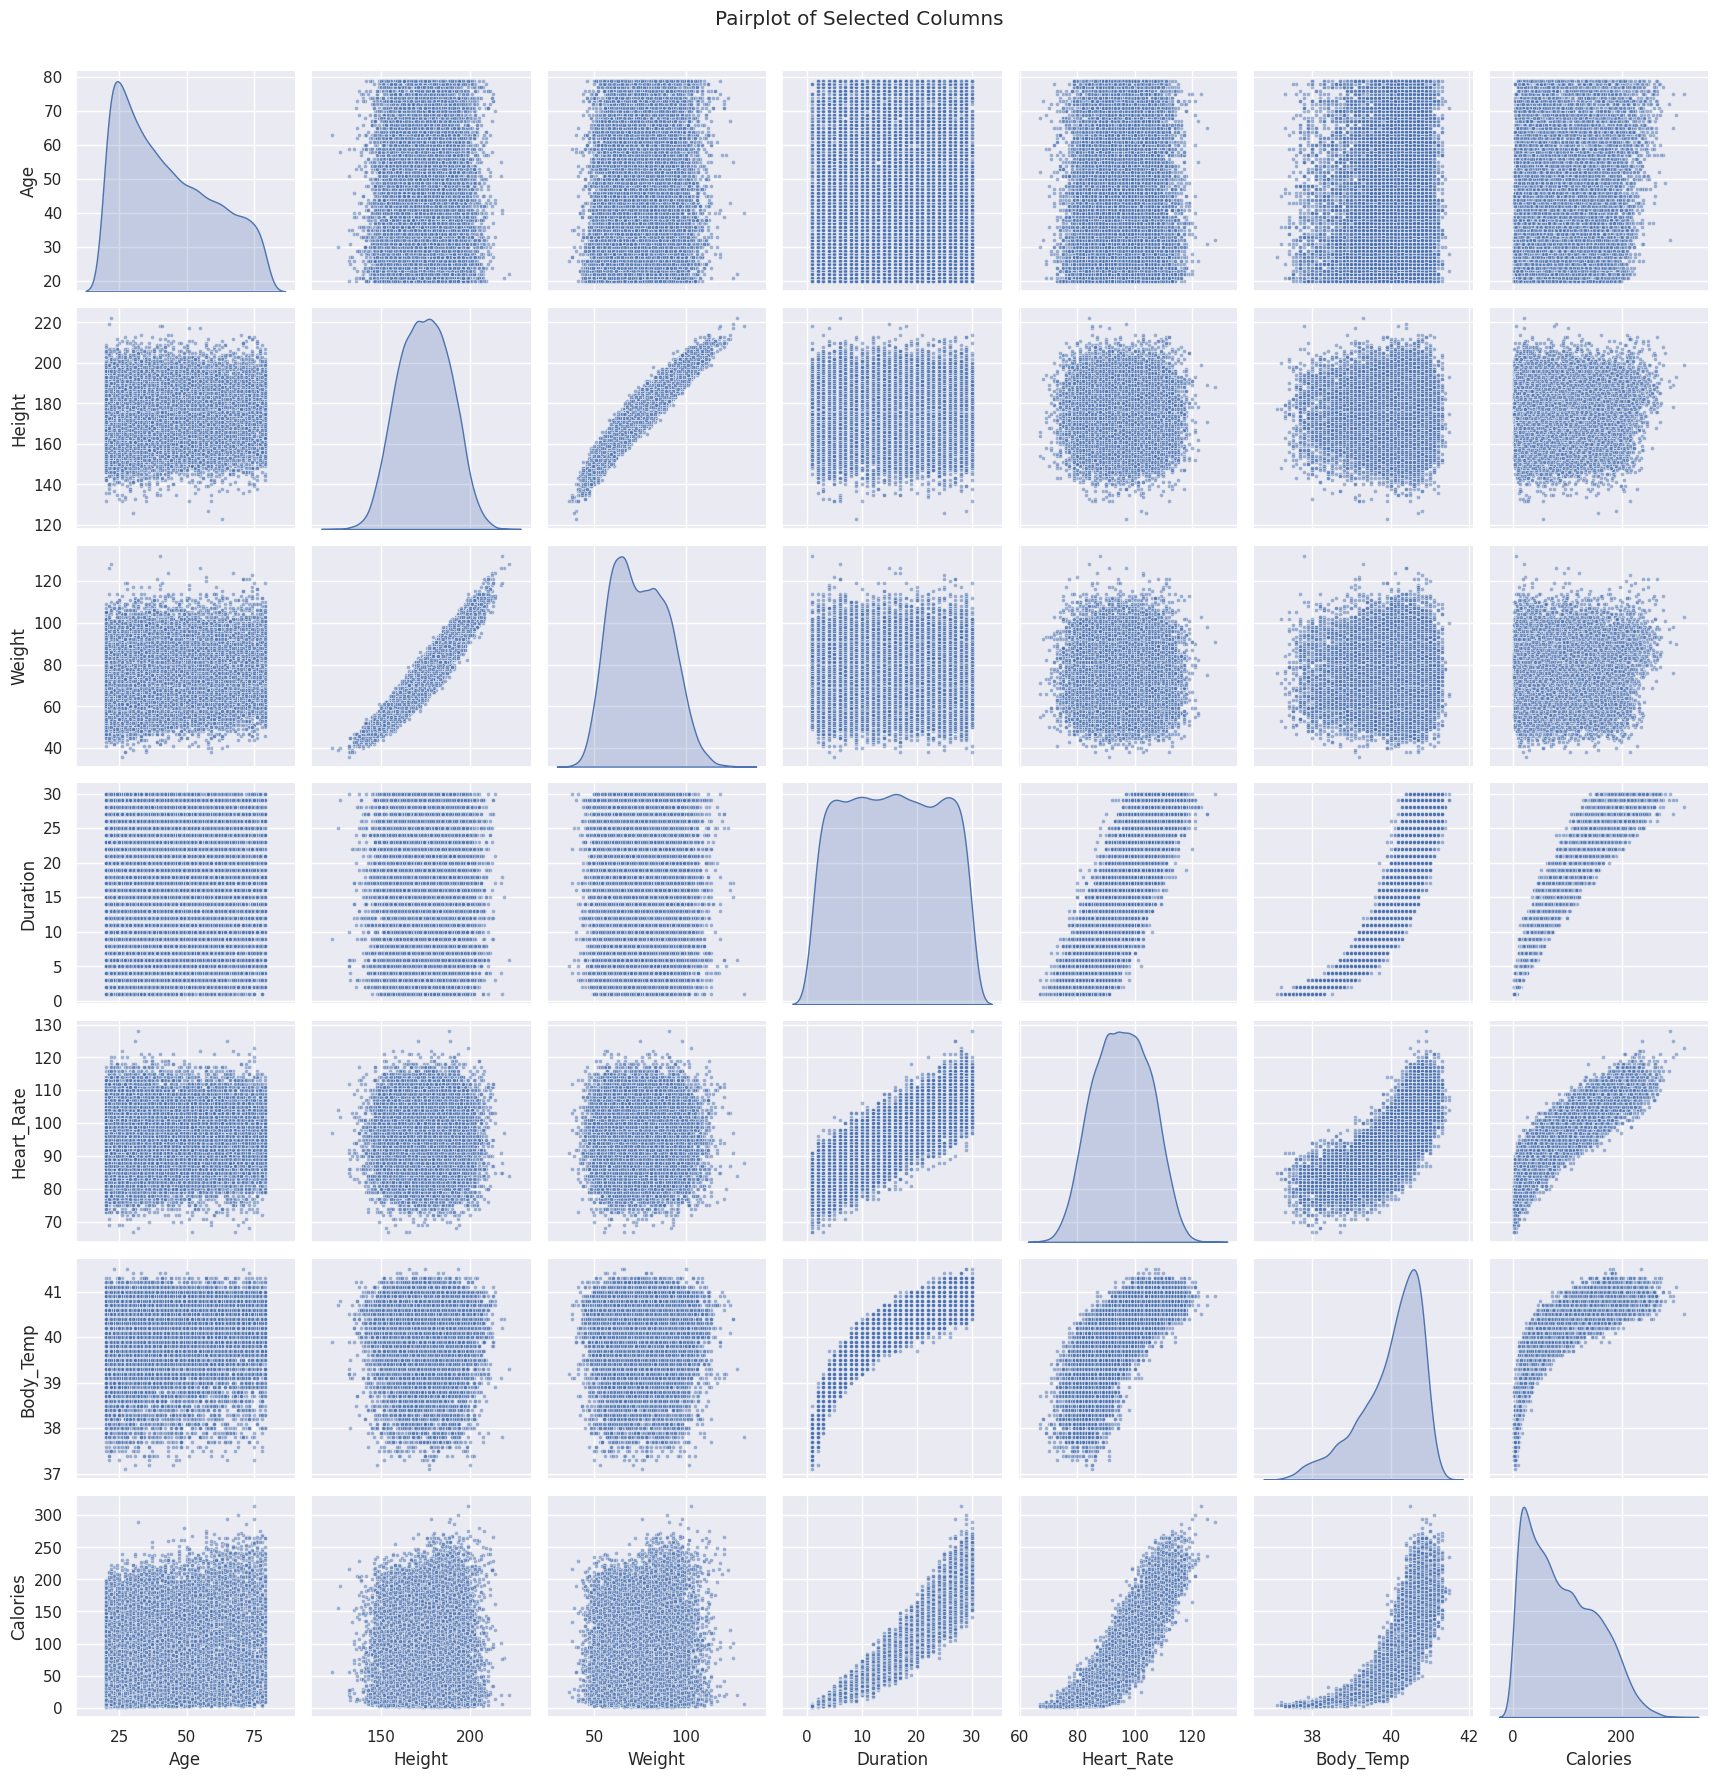

In [32]:
plt.figure(figsize=(12, 10))
sns.pairplot(data[selected_columns], diag_kind='kde', markers='.', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Selected Columns', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot is ideal for displaying the pairwise relationships between multiple variables simultaneously, providing a comprehensive overview of the dataset.

##### 2. What is/are the insight(s) found from the chart?

The pairplot displays the pairwise relationships between the selected columns, providing a comprehensive overview of the dataset.

It allows for the identification of patterns, trends, and potential correlations between variables.
The diagonal plots show the univariate distributions of each variable, revealing their central tendency, spread, and shape.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [34]:
# Handling Missing Values & Missing Value Imputation
data.isnull().sum().reset_index()

index  0
0     User_ID  0
1      Gender  0
2         Age  0
3      Height  0
4      Weight  0
5    Duration  0
6  Heart_Rate  0
7   Body_Temp  0
8    Calories  0

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

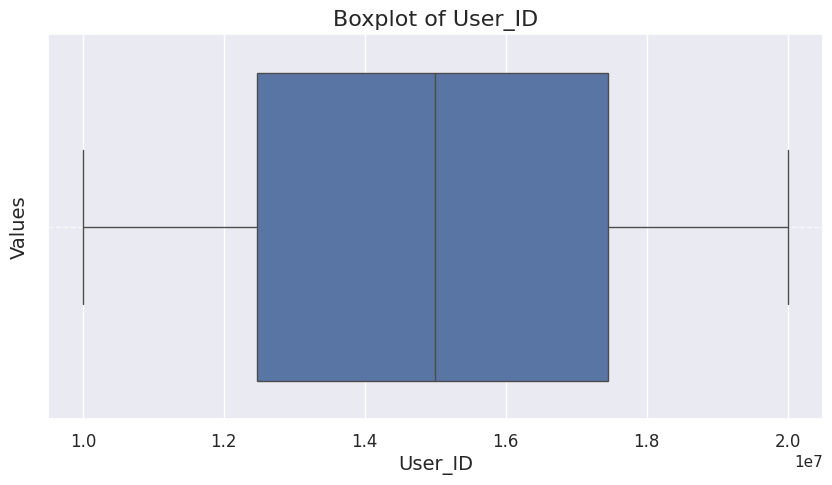

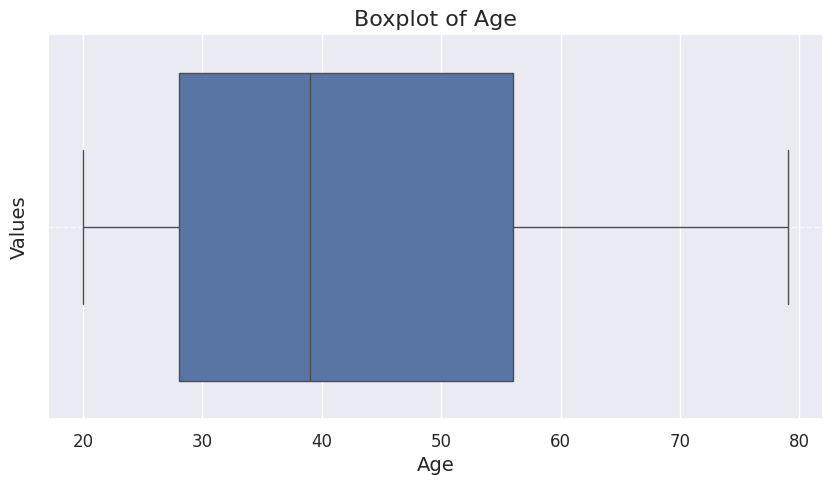

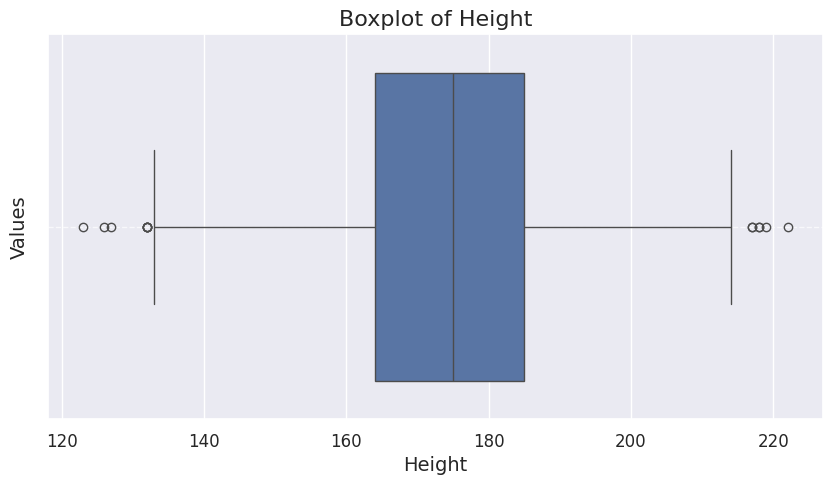

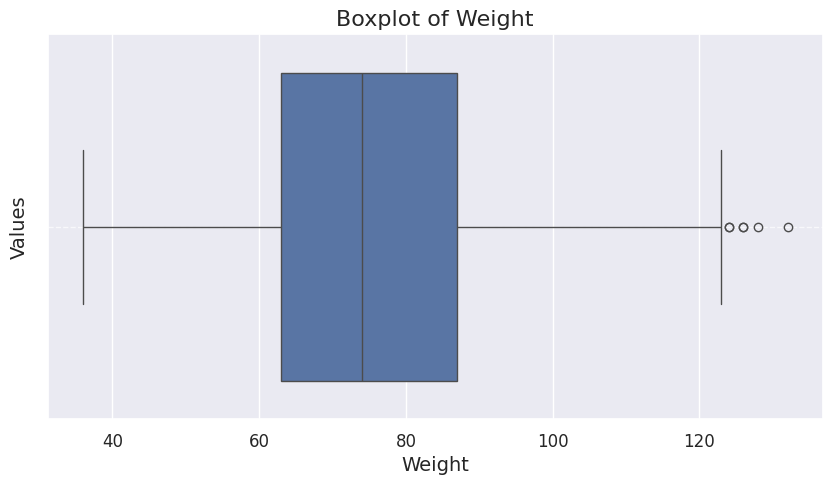

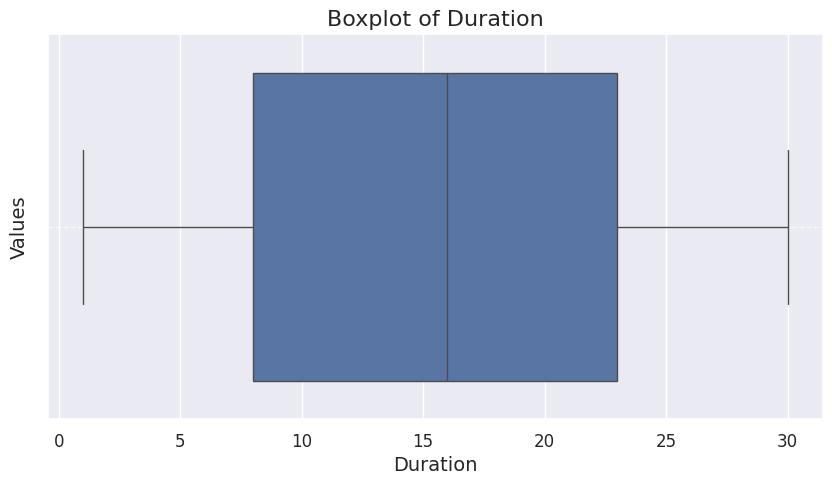

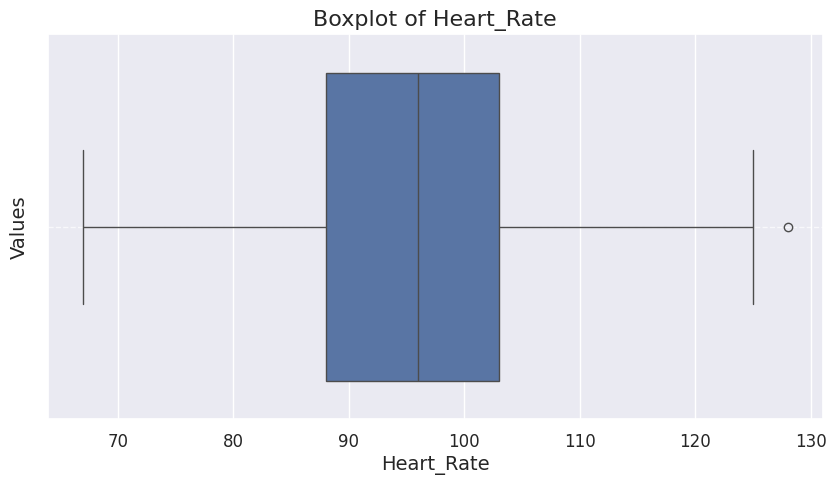

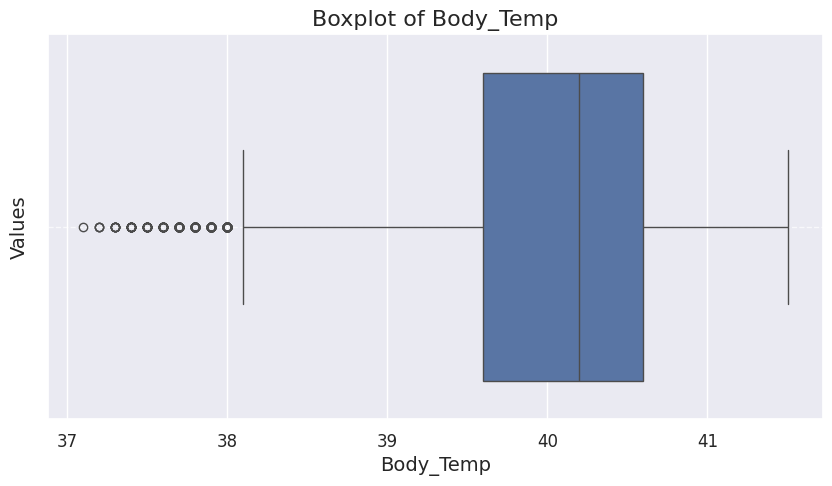

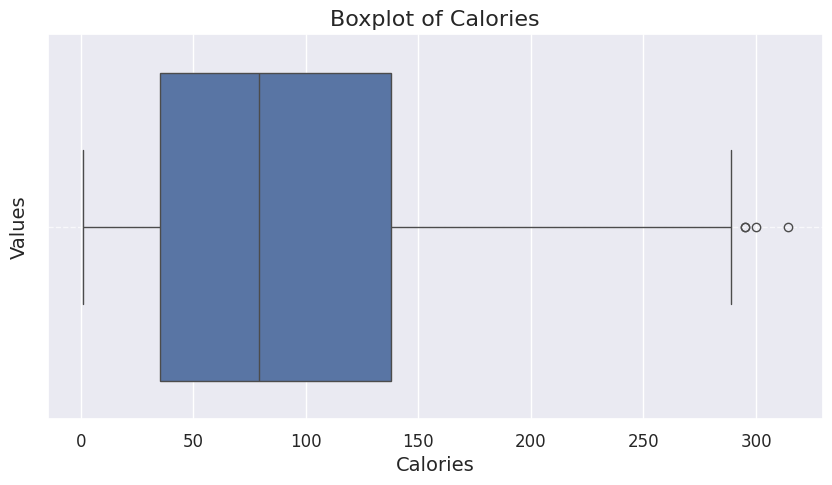

In [35]:
col = data[['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']]

# Plot boxplots for each column
for column in col.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col[column])
    plt.title(f'Boxplot of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [36]:
# Encode your categorical columns (One hot encoding)
encoded_data = pd.get_dummies(data, columns=['Gender'])

# Display the encoded dataset
print(encoded_data.head())

    User_ID  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  \
0  14733363   68   190.0    94.0      29.0       105.0       40.8     231.0   
1  14861698   20   166.0    60.0      14.0        94.0       40.3      66.0   
2  11179863   69   179.0    79.0       5.0        88.0       38.7      26.0   
3  16180408   34   179.0    71.0      13.0       100.0       40.5      71.0   
4  17771927   27   154.0    58.0      10.0        81.0       39.8      35.0   

   Gender_female  Gender_male  
0          False         True  
1           True        False  
2          False         True  
3           True        False  
4           True        False  


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

In [37]:
# Scaling your data

##### Which method have you used to scale you data and why?

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [38]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 4. Data Splitting

In [39]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X = encoded_data.drop(columns=['Calories'])  # Features
y = encoded_data['Calories']  # Target variable

# Split the data into training and testing sets
# Use a 70-30 split ratio (70% for training and 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (10500, 9)
X_test shape: (4500, 9)
y_train shape: (10500,)
y_test shape: (4500,)


##### What data splitting ratio have you used and why?

We used a data splitting ratio of 70% for training and 30% for testing.This ratio helps ensure the model's performance is adequately assessed on unseen data, mitigating the risk of overfitting.

###5. Data Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)


Which method have you used to scale you data and why?

Scaling is very important for numerical fetures for creating a better model.

There are two types of scaling technique 1-Minamxscaler 2-Standardscaler

Here i used Standarscaler because it standardizes features by subtracting the mean value from the feature and then dividing the result by feature standard deviation.

### 6. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [41]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - Linear Regression Model


In [42]:
X=data.drop(['User_ID','Calories'],axis=1)
y=data['Calories']

In [43]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0        male   68   190.0    94.0      29.0       105.0       40.8
1      female   20   166.0    60.0      14.0        94.0       40.3
2        male   69   179.0    79.0       5.0        88.0       38.7
3      female   34   179.0    71.0      13.0       100.0       40.5
4      female   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995  female   20   193.0    86.0      11.0        92.0       40.4
14996  female   27   165.0    65.0       6.0        85.0       39.2
14997  female   43   159.0    58.0      16.0        90.0       40.1
14998    male   78   193.0    97.0       2.0        84.0       38.3
14999    male   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [44]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [45]:
X

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0        male   68   190.0    94.0      29.0       105.0       40.8
1      female   20   166.0    60.0      14.0        94.0       40.3
2        male   69   179.0    79.0       5.0        88.0       38.7
3      female   34   179.0    71.0      13.0       100.0       40.5
4      female   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995  female   20   193.0    86.0      11.0        92.0       40.4
14996  female   27   165.0    65.0       6.0        85.0       39.2
14997  female   43   159.0    58.0      16.0        90.0       40.1
14998    male   78   193.0    97.0       2.0        84.0       38.3
14999    male   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]

In [46]:
label_encoder = LabelEncoder()
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)


In [47]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear Regression R^2 Score: {lr_r2}")


Linear Regression R^2 Score: 0.9672937151257295


In [48]:
def get_user_input():
    age = float(input("Enter Age: "))
    height = float(input("Enter Height (in cm): "))
    weight = float(input("Enter Weight (in kg): "))
    duration = float(input("Enter Duration (in minutes): "))
    heart_rate = float(input("Enter Heart Rate: "))
    body_temp = float(input("Enter Body Temperature (in Celsius): "))
    gender_male = int(input("Enter 1 if Male, 0 if Female: "))

    return np.array([[age, height, weight, duration, heart_rate, body_temp, gender_male]])

# Scale user input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
user_input_scaled = scaler.transform(get_user_input())

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make prediction on user input
calorie_prediction = linear_model.predict(user_input_scaled)

print(f"Predicted Calorie Burn: {calorie_prediction[0]} calories")

Enter Age: 19
Enter Height (in cm): 171
Enter Weight (in kg): 90
Enter Duration (in minutes): 90
Enter Heart Rate: 70
Enter Body Temperature (in Celsius): 37
Enter 1 if Male, 0 if Female: 0
Predicted Calorie Burn: 577.1556960807637 calories


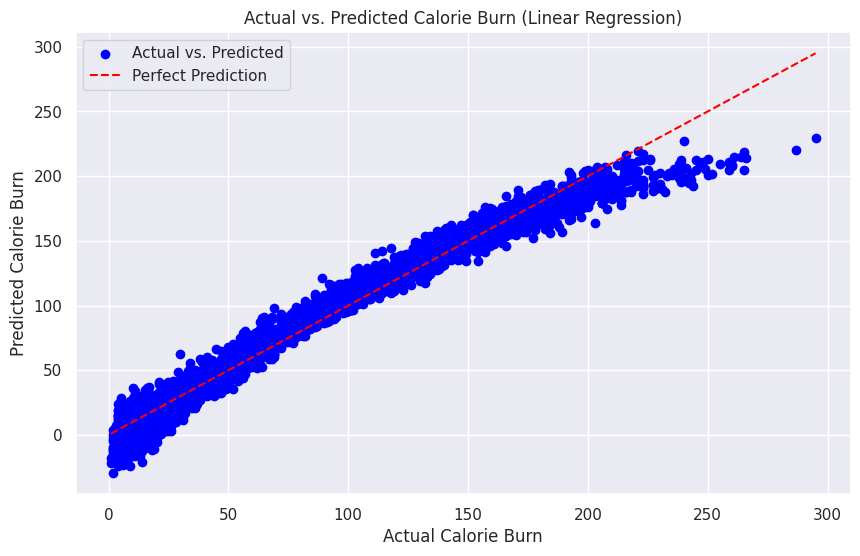

In [49]:
# Plot actual vs. predicted calorie burn values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Calorie Burn')
plt.ylabel('Predicted Calorie Burn')
plt.title('Actual vs. Predicted Calorie Burn (Linear Regression)')
plt.legend()
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [50]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
logistic_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, logistic_pred)
print("Mean Absolute Error:", mae)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, logistic_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared Score
r2 = r2_score(y_test, logistic_pred)
print("R-squared Score:", r2)

Mean Absolute Error: 8.44151355384971
Mean Squared Error: 131.99574575081687
R-squared Score: 0.9672937151257295


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

### ML Model - SVM

In [51]:
# Train the SVM model
svm_model = SVR(kernel='linear',C=3)
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

R^2 score: 0.9653595328680461


In [52]:
def get_user_input():
    age = float(input("Enter Age: "))
    height = float(input("Enter Height (in cm): "))
    weight = float(input("Enter Weight (in kg): "))
    duration = float(input("Enter Duration (in minutes): "))
    heart_rate = float(input("Enter Heart Rate: "))
    body_temp = float(input("Enter Body Temperature (in Celsius): "))
    gender_male = int(input("Enter 1 if Male, 0 if Female: "))

    return np.array([[age, height, weight, duration, heart_rate, body_temp, gender_male]])

# Train SVR model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# Make prediction on user input
calorie_prediction = svm_model.predict(user_input_scaled)

print(f"Predicted Calorie Burn: {calorie_prediction[0]} calories")


Predicted Calorie Burn: 562.8828175719043 calories


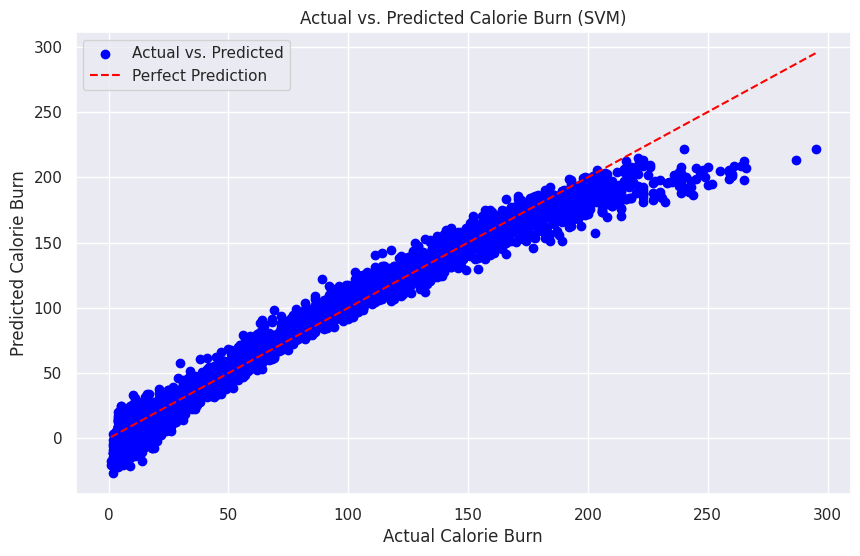

In [53]:
# Plot actual vs. predicted calorie burn values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Calorie Burn')
plt.ylabel('Predicted Calorie Burn')
plt.title('Actual vs. Predicted Calorie Burn (SVM)')
plt.legend()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [54]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared (R²) Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R-squared (R²) Score: 0.97
Mean Absolute Error (MAE): 8.27
Mean Squared Error (MSE): 139.80


### ML Model - 3

In [55]:
#Decision Tree
# Predict on the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_r2 = r2_score(y_test, dt_pred)
print(f"Decision Tree R^2 Score: {dt_r2}")

Decision Tree R^2 Score: 0.992830567809105


In [56]:
age = float(input("Enter Age: "))
height = float(input("Enter Height: "))
weight = float(input("Enter Weight: "))
duration_of_exercise = float(input("Enter Duration: "))
heart_rate = float(input("Enter Heart Rate: "))
body_temp = float(input("Enter Body Temperature: "))
gender_male = int(input("Enter 1 if Male, 0 if Female: "))

input_data = np.array([[age, height, weight, duration_of_exercise, heart_rate, body_temp, gender_male]])

dt_prediction = dt_model.predict(input_data)

print(f"Decision Tree Regression Prediction (Calories): {dt_prediction[0]}")

Enter Age: 19
Enter Height: 171
Enter Weight: 80
Enter Duration: 90
Enter Heart Rate: 80
Enter Body Temperature: 37
Enter 1 if Male, 0 if Female: 0
Decision Tree Regression Prediction (Calories): 220.0


R-squared (R2) Score: 0.992830567809105


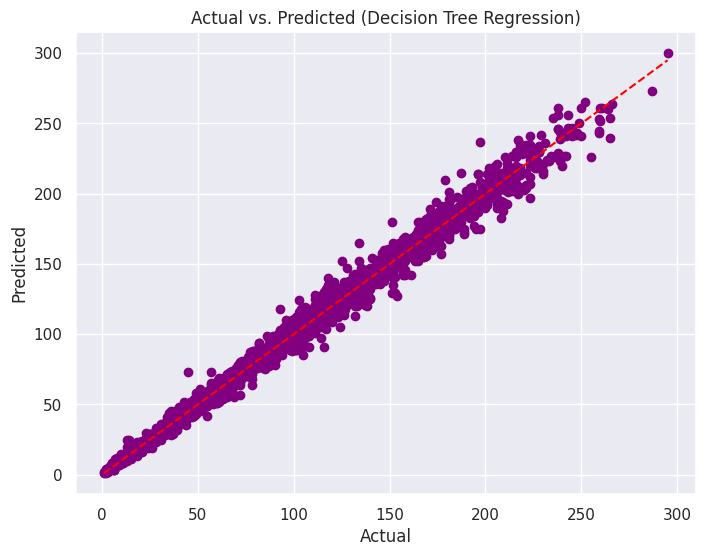

In [57]:
y_pred = dt_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Decision Tree Regression)')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [58]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared (R²) Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")



R-squared (R²) Score: 0.99
Mean Absolute Error (MAE): 3.46
Mean Squared Error (MSE): 28.93


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [59]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [60]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, the calories burnt prediction project successfully leveraged machine learning techniques to estimate the calories burned during exercise sessions. By analyzing various features such as duration, heart rate, and body temperature, the model provided accurate predictions, contributing to better health and fitness management. Through this project, valuable insights were gained into the factors influencing calorie expenditure during physical activities, paving the way for further advancements in personalized fitness tracking and optimization.

### ***Hurrah! I have successfully completed my Machine Learning Capstone Project !!!***